In [1]:
# You might need to run "pip install tf-nightly" in your command line!

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
2.6.0-dev20210330


In [5]:
diamonds = sns.load_dataset("diamonds")

#### Exploration

In [6]:
diamonds.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
44896,0.50,Premium,E,VS2,62.4,62.0,1629,5.07,5.03,3.15
53786,0.73,Premium,F,SI1,62.2,56.0,2728,5.79,5.73,3.58
8872,1.04,Premium,E,SI2,59.2,58.0,4484,6.64,6.70,3.95
31932,0.30,Premium,F,VS2,60.7,58.0,776,4.35,4.32,2.63
3783,0.96,Ideal,I,VS2,59.8,57.0,3462,6.42,6.39,3.83


In [7]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [8]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


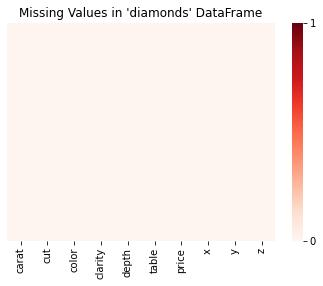

In [9]:
fig, ax = plt.subplots(1, 1)

sns.heatmap(diamonds.isna(), ax=ax, vmin=0, vmax=1, cmap="Reds", cbar_kws={"ticks":[0,1]})

ax.set_yticks([])
ax.set_title("Missing Values in 'diamonds' DataFrame")
plt.show()

#### Dummies
... but this time automatically

In [10]:
diamonds = pd.get_dummies(diamonds)
diamonds.sample(5)

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
10810,1.00,62.1,57.0,4864,6.35,6.40,3.96,0,0,1,...,0,0,0,0,0,0,0,1,0,0
49252,0.71,62.1,56.0,2086,5.76,5.71,3.56,1,0,0,...,0,0,0,0,0,0,0,0,1,0
29922,0.32,61.1,56.0,713,4.42,4.45,2.71,1,0,0,...,0,0,0,0,0,1,0,0,0,0
21539,1.20,62.0,55.0,9641,6.81,6.83,4.23,1,0,0,...,0,0,0,0,0,1,0,0,0,0
23504,1.51,62.0,58.0,11512,7.27,7.31,4.52,0,0,1,...,1,0,0,1,0,0,0,0,0,0


In [11]:
diamonds[["carat", "x", "y", "z", "depth", "price"]].corr().style.background_gradient(cmap="coolwarm")

,carat,x,y,z,depth,price
carat,1.000000,0.975094,0.951722,0.953387,0.028224,0.921591
x,0.975094,1.000000,0.974701,0.970772,-0.025289,0.884435
y,0.951722,0.974701,1.000000,0.952006,-0.029341,0.865421
z,0.953387,0.970772,0.952006,1.000000,0.094924,0.861249
depth,0.028224,-0.025289,-0.029341,0.094924,1.000000,-0.010647
price,0.921591,0.884435,0.865421,0.861249,-0.010647,1.000000


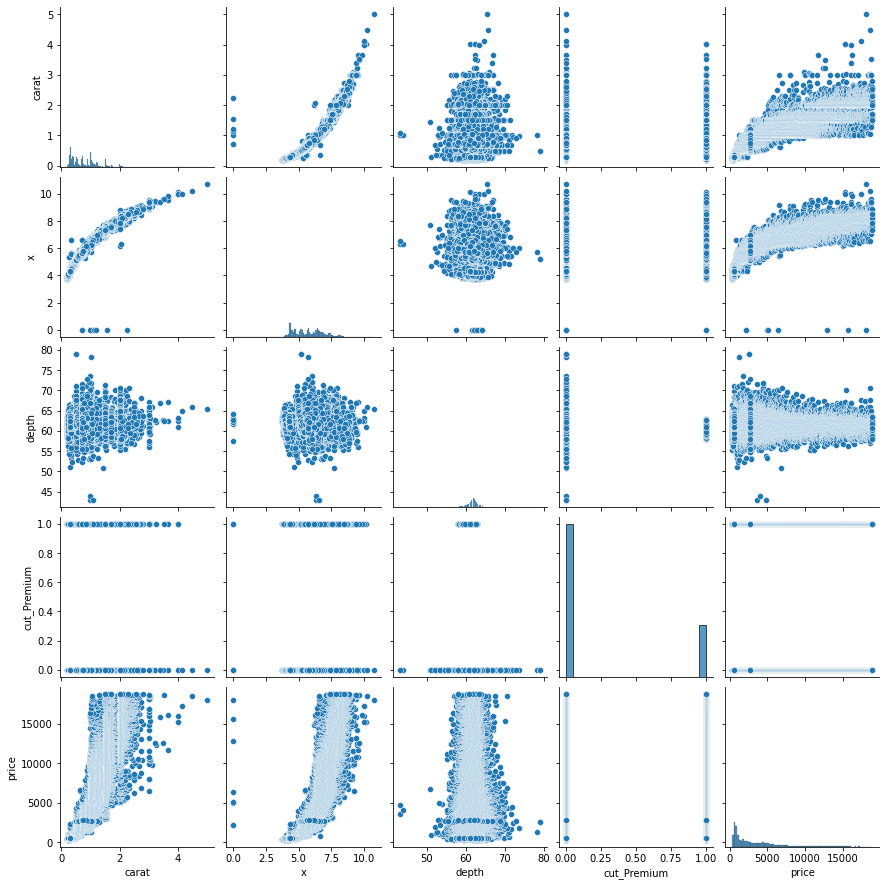

In [12]:
sns.pairplot(diamonds[["carat", "x", "depth", "cut_Premium", "price"]])
plt.show()

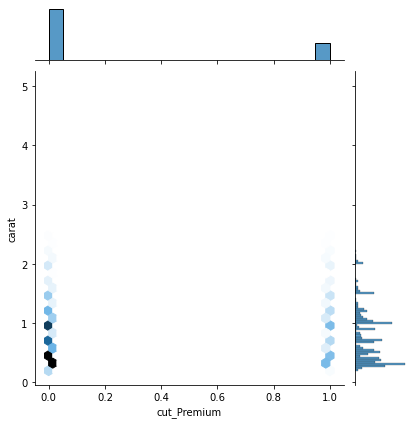

In [15]:
sns.jointplot(x="cut_Premium", y="carat", data=diamonds, kind="hex")

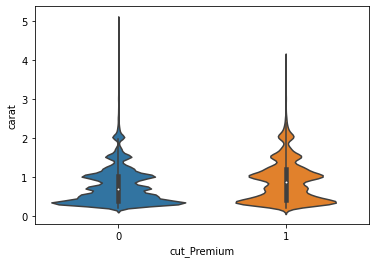

In [19]:
sns.violinplot(x="cut_Premium", y="carat", data=diamonds)
plt.show()

In [20]:
X = diamonds.drop("price", axis=1)
y = diamonds["price"]

#### Split into sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
X_train.describe()

,carat,depth,table,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
count,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,...,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000
mean,0.798500,61.749028,57.451910,5.733015,5.734943,3.539137,0.401504,0.255284,0.222761,0.091424,...,0.101118,0.052068,0.032947,0.067006,0.095371,0.150882,0.226495,0.243127,0.169951,0.014222
std,0.473703,1.440256,2.237323,1.121086,1.113084,0.694299,0.490209,0.436026,0.416105,0.288215,...,0.301488,0.222168,0.178499,0.250035,0.293730,0.357938,0.418569,0.428977,0.375594,0.118407
min,0.200000,43.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.720000,4.730000,2.910000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.010000,79.000000,95.000000,10.740000,10.540000,6.980000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
st_scaler = StandardScaler()
X_train_scaled = st_scaler.fit_transform(X_train)

In [25]:
X_train_scaled.shape[1]

26

In [31]:
X_train_scaled[1]

array([ 0.34093597,  7.25642531, -0.64895801,  0.24707166,  0.06743242,
        1.06708031, -0.81905789, -0.58548538, -0.53535512, -0.31721254,
        5.7836606 , -0.3793018 , -0.47203004, -0.45876343,  1.94005549,
       -0.42835495, -0.33539922, -0.23436825, -0.18457823, -0.26798857,
       -0.32469208, -0.42153591, -0.54112526, -0.56676813,  2.20999049,
       -0.12011386])

#### What's different -- nothing so far

In [30]:
model = keras.Sequential(
    [layers.Dense(36, activation="relu", input_shape=[X_train_scaled.shape[1]]),
     layers.Dense(36, activation="relu"),
     layers.Dense(1)])

optimizer = keras.optimizers.RMSprop(0.001)

model.compile(loss='mse', optimizer=optimizer, metrics=["mae", "mse"])

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 36)                972       
_________________________________________________________________
dense_13 (Dense)             (None, 36)                1332      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 37        
Total params: 2,341
Trainable params: 2,341
Non-trainable params: 0
_________________________________________________________________


In [34]:
X_test_scaled = st_scaler.transform(X_test)

In [35]:
model.predict(X_test_scaled)

array([[-0.0434405 ],
       [ 0.4442229 ],
       [-0.2846761 ],
       ...,
       [-0.02592932],
       [ 0.37855121],
       [-0.10158122]], dtype=float32)

In [36]:
epochs = 10

history = model.fit(X_train_scaled, y_train, epochs=epochs, validation_split=0.2)

Epoch 1/10
944/944 [==============================] - 9s 8ms/step - loss: 28758653.3376 - mae: 3758.9676 - mse: 28758653.3376 - val_loss: 9731429.0000 - val_mae: 2045.8938 - val_mse: 9731429.0000
Epoch 2/10
944/944 [==============================] - 8s 8ms/step - loss: 5045591.9241 - mae: 1488.7941 - mse: 5045591.9241 - val_loss: 1443485.7500 - val_mae: 768.2411 - val_mse: 1443485.7500
Epoch 3/10
944/944 [==============================] - 9s 10ms/step - loss: 1231850.6949 - mae: 702.3064 - mse: 1231850.6949 - val_loss: 840322.7500 - val_mae: 590.6912 - val_mse: 840322.7500.8190 - mse: 1237240
Epoch 4/10
944/944 [==============================] - 9s 10ms/step - loss: 804183.9339 - mae: 580.5020 - mse: 804183.9339 - val_loss: 716330.3125 - val_mae: 545.5497 - val_mse: 716330.3125
Epoch 5/10
944/944 [==============================] - 10s 11ms/step - loss: 736376.0394 - mae: 534.9160 - mse: 736376.0394 - val_loss: 659276.6875 - val_mae: 501.6224 - val_mse: 659276.6875
Epoch 6/10
944/944 [=

In [37]:
history_df = pd.DataFrame(history.history)
history_df

,loss,mae,mse,val_loss,val_mae,val_mse
0,2.412876e+07,3384.165039,2.412876e+07,9.731429e+06,2045.893799,9.731429e+06
1,3.333052e+06,1189.025513,3.333052e+06,1.443486e+06,768.241089,1.443486e+06
2,1.044630e+06,649.845886,1.044630e+06,8.403228e+05,590.691162,8.403228e+05
3,7.919798e+05,569.158447,7.919798e+05,7.163303e+05,545.549744,7.163303e+05
4,7.183685e+05,525.490845,7.183685e+05,6.592767e+05,501.622375,6.592767e+05
5,6.703199e+05,489.292206,6.703199e+05,6.156742e+05,473.769836,6.156742e+05
6,6.321261e+05,461.582520,6.321261e+05,5.845634e+05,449.627655,5.845634e+05
7,6.013111e+05,438.792175,6.013111e+05,5.439766e+05,424.857208,5.439766e+05
8,5.740787e+05,421.386719,5.740787e+05,5.193230e+05,409.058258,5.193230e+05
9,5.518020e+05,407.533356,5.518020e+05,4.970061e+05,395.038696,4.970061e+05


In [40]:
root_df = history_df[["mse", "val_mse"]].apply(np.sqrt)

In [41]:
root_df.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
root_df

,rmse,val_rmse
0,4912.103419,3119.523842
1,1825.664879,1201.451518
2,1022.071273,916.691197
3,889.932441,846.362991
4,847.566222,811.958550
5,818.730649,784.649125
6,795.063598,764.567443
7,775.442535,737.547668
8,757.679805,720.640709
9,742.833763,704.986569


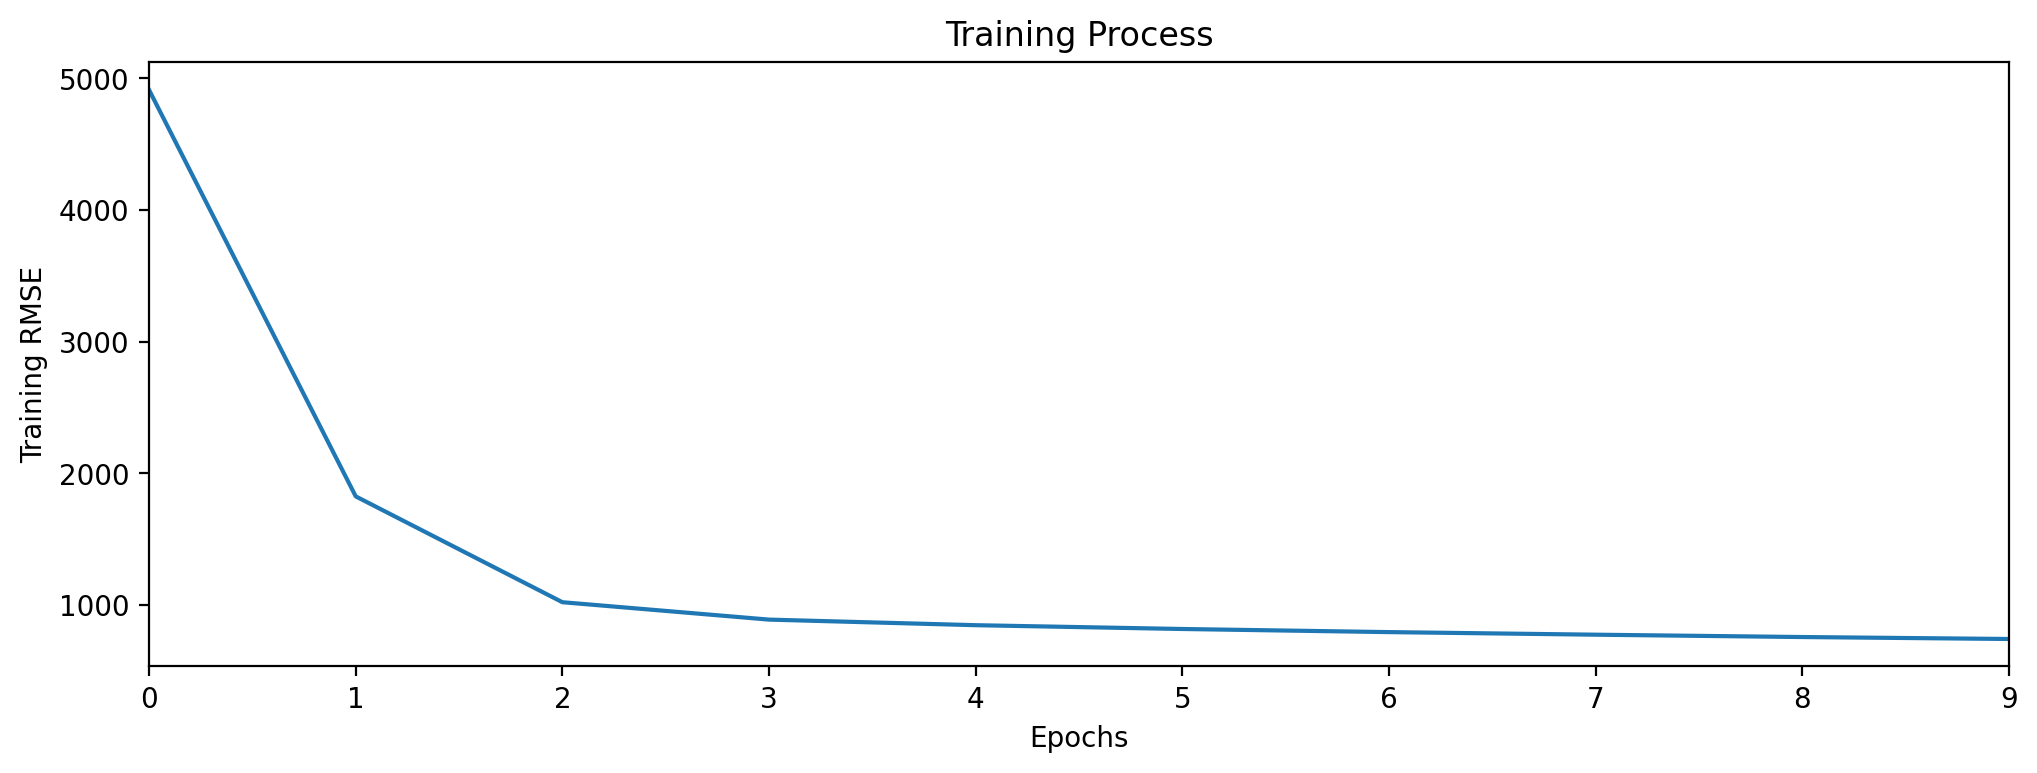

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(12,4), dpi=200)

ax.plot(root_df["rmse"])

ax.set_xlabel("Epochs")
ax.set_ylabel("Training RMSE")

ax.set_title("Training Process")

ax.set_xlim([0, epochs-1])

plt.show()

In [45]:
X_test_scaled = st_scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [46]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

RMSE:  1128.1490458465855
MAE:  406.55376185482123


#### Let's combine NNs with other advanced techniques

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [71]:
def NNRegressor(nn_optimizer="adam"):
    model = keras.Sequential(
    [layers.Dense(36, activation="relu", input_shape=[X_train.shape[1]]),
     layers.Dropout(0.2),
     layers.Dense(36, activation="relu"),
     layers.Dropout(0.2),
     layers.Dense(24, activation="relu"),
     layers.Dropout(0.2),
     layers.Dense(1)])
    
    if nn_optimizer == "adam":
        optimizer = keras.optimizers.Adam()
    #elif optimizer == ...
    #    ...
    else:
        optimizer = keras.optimizers.RMSProp(0.001)
    
    model.compile(loss="mse", optimizer=optimizer, metrics=["mse", "mae"])
    
    return model

In [72]:
epochs = 20

In [73]:
rs = RobustScaler()
nn = KerasRegressor(NNRegressor, epochs=epochs, validation_split=0.2, nn_optimizer="adam")

In [74]:
pipe = Pipeline([
    ("Robust Scaler", rs),
    ("Neural Network", nn)
])

In [75]:
pipe.fit(X_train, y_train)

Epoch 1/20
944/944 [==============================] - 3s 2ms/step - loss: 18887773.4783 - mse: 18887773.4783 - mae: 2688.2743 - val_loss: 1432204.1250 - val_mse: 1432204.1250 - val_mae: 745.4116
Epoch 2/20
944/944 [==============================] - 2s 2ms/step - loss: 2129196.4289 - mse: 2129196.4289 - mae: 884.4413 - val_loss: 935680.5000 - val_mse: 935680.5000 - val_mae: 560.8595
Epoch 3/20
944/944 [==============================] - 2s 2ms/step - loss: 1750766.7376 - mse: 1750766.7376 - mae: 783.7116 - val_loss: 870391.2500 - val_mse: 870391.2500 - val_mae: 531.8979
Epoch 4/20
944/944 [==============================] - 2s 2ms/step - loss: 1657510.0410 - mse: 1657510.0410 - mae: 762.3207 - val_loss: 731798.7500 - val_mse: 731798.7500 - val_mae: 481.0411
Epoch 5/20
944/944 [==============================] - 2s 2ms/step - loss: 1607984.4280 - mse: 1607984.4280 - mae: 733.7610 - val_loss: 636733.6250 - val_mse: 636733.6250 - val_mae: 443.3787
Epoch 6/20
944/944 [=========================

Pipeline(steps=[('Robust Scaler', RobustScaler()),
                ('Neural Network',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f8fda3fba60>)])

In [76]:
y_pred = pipe.predict(X_test)

In [77]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

RMSE:  1262.22037525915
MAE:  417.88812134407635
